In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os

from src.cpoints import get_cpoints
from src.io import *
from src.plot import *
from src.utils import *

In [5]:
device = get_device()

Device: cuda


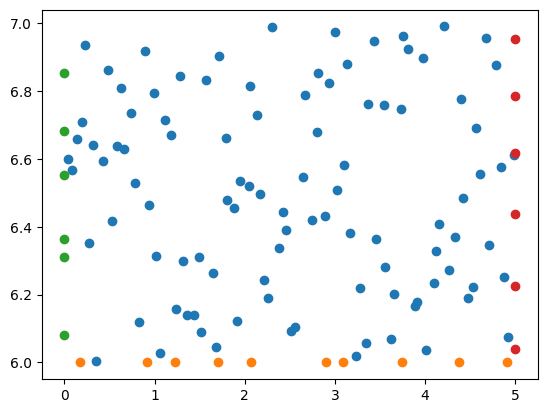

In [10]:
c = get_cpoints("latin")
c_points = c(1,1,100, 10, 6, (0,5), (6,7), torch.device("cpu"))
figure, ax = plt.subplots()
x, t = c_points.residual()
ax.scatter(x.detach().flatten().numpy(), t.detach().flatten().numpy())
x, t = c_points.init()
ax.scatter(x.detach().flatten().numpy(), t.detach().flatten().numpy())
x, t = c_points.boundary_left()
ax.scatter(x.detach().flatten().numpy(), t.detach().flatten().numpy())
x, t = c_points.boundary_right()
ax.scatter(x.detach().flatten().numpy(), t.detach().flatten().numpy())

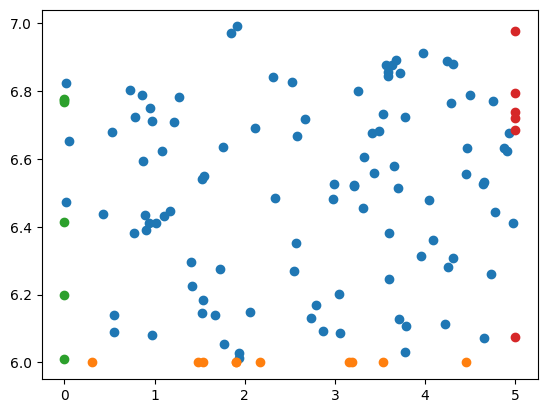

In [8]:
c = get_cpoints("rand")
c_points = c(1,1,100, 10, 6, (0,5), (6,7), torch.device("cpu"))
figure, ax = plt.subplots()
x, t = c_points.residual()
ax.scatter(x.detach().flatten().numpy(), t.detach().flatten().numpy())
x, t = c_points.init()
ax.scatter(x.detach().flatten().numpy(), t.detach().flatten().numpy())
x, t = c_points.boundary_left()
ax.scatter(x.detach().flatten().numpy(), t.detach().flatten().numpy())
x, t = c_points.boundary_right()
ax.scatter(x.detach().flatten().numpy(), t.detach().flatten().numpy())

In [9]:
c = get_cpoints("latin")
c_points = c(10,10,100, 10, 6, (0,5), (6,7), torch.device("cpu"))
x, t = c_points.residual()

In [21]:
df = pd.read_csv("results/problems.csv")
df.columns

Index(['length', 'total_time', 'n_points_x', 'n_points_t', 'n_points_rand',
       'n_points_init', 'n_points_boundary', 'weight_residual',
       'weight_initial', 'weight_boundary', 'adapt_weights', 'layers',
       'neurons_per_layer', 'epochs', 'learning_rate', 'activation', 'c', 'a',
       'phi', 'equation', 'boundary_condition', 'hard_constraint', 'exact',
       'collocation_points', 'tag', 'loss', 'loss_residual', 'loss_initial',
       'loss_boundary', 'l2_error', 'l2_error_init'],
      dtype='object')

In [24]:
res_df = df[
    (df["a"] == 1) &
    (df["phi"] == 4) &
    (df["boundary_condition"] == 'zero')
    ]
res_df

,length,total_time,n_points_x,n_points_t,n_points_rand,n_points_init,n_points_boundary,weight_residual,weight_initial,weight_boundary,...,hard_constraint,exact,collocation_points,tag,loss,loss_residual,loss_initial,loss_boundary,l2_error,l2_error_init
4,1.0,1.0,150,150,10000,150,150,1.0,1.0,1.0,...,False,True,const,dir_c03_A1_phi4,1,2,3,4,5,6
13,1.0,1.0,150,150,10000,150,150,1.0,1.0,1.0,...,False,True,const,dir_c05_A1_phi4,1,2,3,4,5,6
22,1.0,1.0,150,150,10000,150,150,1.0,1.0,1.0,...,False,True,const,dir_c1_A1_phi4,1,2,3,4,5,6
31,1.0,1.0,150,150,10000,150,150,1.0,1.0,1.0,...,False,True,const,dir_c2_A1_phi4,1,2,3,4,5,6
40,1.0,1.0,150,150,10000,150,150,1.0,1.0,1.0,...,False,True,const,dir_c3_A1_phi4,1,2,3,4,5,6


In [ ]:
res_df.plot(x = '')